## Bike Sharing : Multiple Linear regression

***Problem Statement***

Boombike is a bike sharing provider which provides a bike sharing service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
The company wants to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Step1 : Reading and Understanding the data

In [738]:
# Read the csv data into a dataframe
booking = pd.read_csv("day.csv")
booking.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [739]:
# Check the shape of data
booking.shape

(730, 16)

In [740]:
# Check the info of booking data
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [741]:
booking.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


***Insights***
- There are 730 rows and 16 columns
- There no null or missing values
- There are numerical data and categorical data

### Drop irrelevant columns 
- instant - This column can be dropped as it is just an index column and it has no influence on the target variable.
- dteday - This column can be dropped as all the relevant information from the date is already extracted in another columns, like year, month and day of week
- casual and registered - cnt is the total number of users including casual and registered users. So these columns can be dropped.

In [742]:
booking = booking.drop(["instant","dteday","casual","registered"], axis = 1)
booking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step2: Visualizing the variables

### Visualize numerical variables

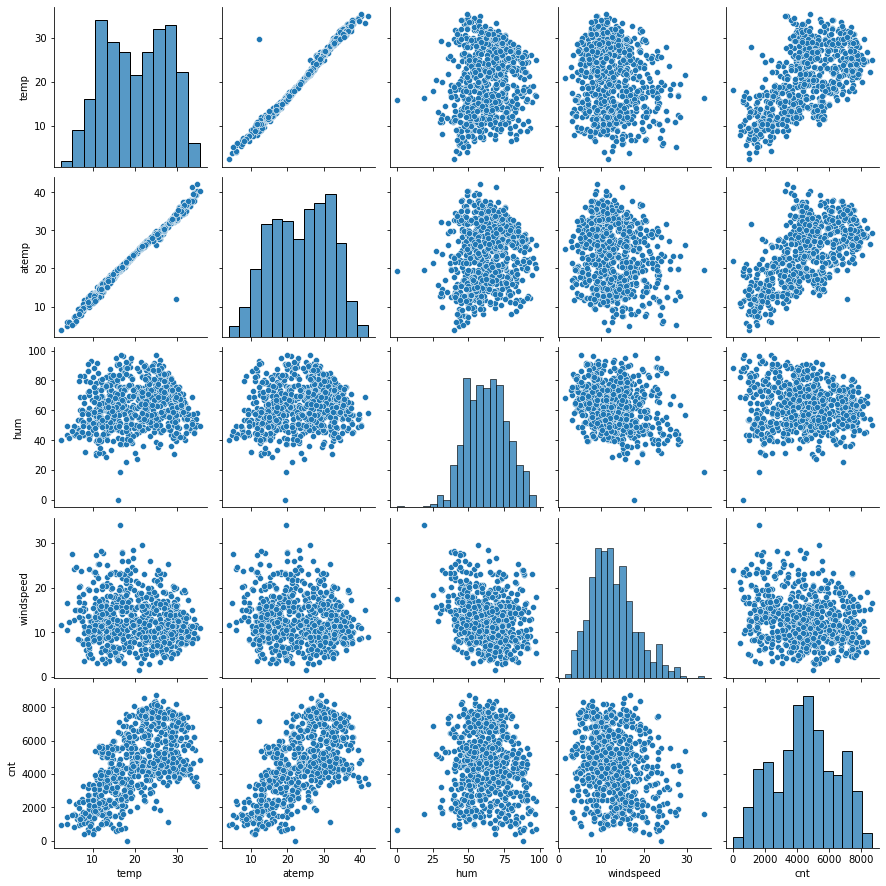

In [743]:
# Make a pairplot of all the numeric variables
num_vars=booking[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(num_vars)
plt.show()

***There is a linear relationship between temp, atemp and cnt variable***

### Visualize categorical variables

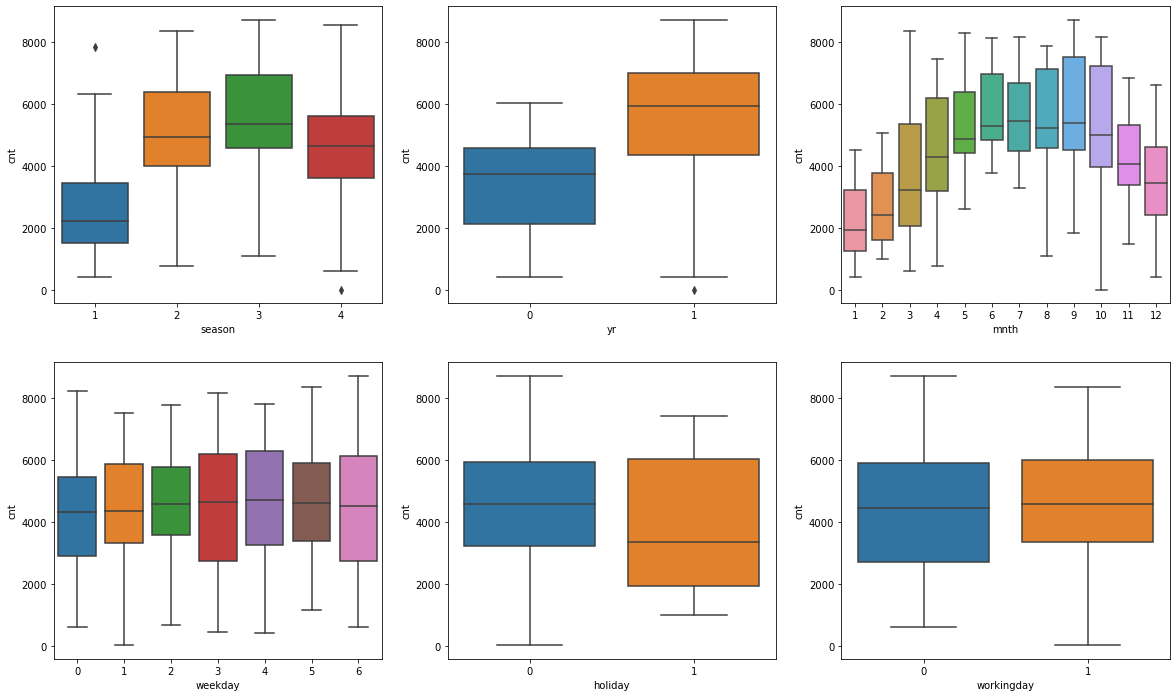

In [744]:
# Make boxplot for categorical variable
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y ='cnt', data = booking)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y ='cnt', data = booking)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y ='cnt', data = booking)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y ='cnt', data = booking)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y ='cnt', data = booking)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y ='cnt', data = booking)

plt.show()

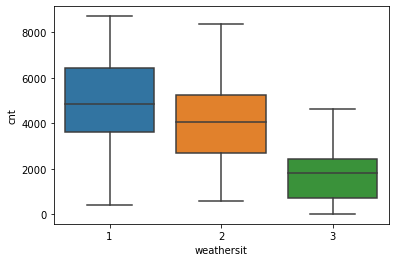

In [745]:
sns.boxplot(x = 'weathersit', y ='cnt', data = booking)
plt.show()

***Insights***
- **Season** - The distribution of booking count for different season varies significantly. Specially for season 2 and season 3, the median is higher then season 1 and season 4. Therefore season can be a good predictor variable.
- **yr** - The distribution of booking count for 2019 is higher than 2018. So yr plays an important role in predicting the booking count.
- **mnth** - mnth shows a significant variation in booking count across different month. Hence mnth can be a good predictor variable.
- **weekday** - The distribution of booking count for different weekday values does not show any significant variation. Median is also almost same for all the day. Hence weekday might not be significant.
- **Holiday** - The median for booking count is more when it is not holiday. So definitely some trend is there and might be a significant variable.
- **Workingday** - The distribution of booking count is almost same for working day 1 and 0. Hence it might not be a significant variable in predicting the booking count.
- **weathersit** - The distribution of booking count for different weathersit varies significantly. Therefore this is a significant variable.


## Step3: Data Preparation

### Map numerical values to its categorical value

In [746]:
# map season values to its categorical name
booking["season"] = booking["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
booking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [747]:
# map season values to its categorical name
##day["mnth"] = day["mnth"].map({1:"mon1", 2:"mon2", 3:"mar", 4:"apr",5:"may", 6:"jun", 7:"jul", 8:"aug",9:"sep", 10:"oct", 11:"nov", 12:"dec"})
##day.head()

In [748]:
# Since different days of week has not much impact on the booking count, map the weekday values to 'weekday' and 'weekend'
# weekend - 0,6 
# Weekday - 1,2,3,4,5
booking["weekday"] = booking["weekday"].map({0:"weekend",1:"weekday",2:"weekday",3:"weekday",4:"weekday",5:"weekday",6:"weekend"})
booking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,weekend,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,weekend,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,weekday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,weekday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,weekday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [749]:
# create a new column weekend
booking["weekend"] = booking["weekday"].map({"weekend":1,"weekday":0})

# drop weekday column 
booking = booking.drop("weekday", axis = 1)
booking.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekend
0,spring,0,1,0,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0
4,spring,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0


In [750]:
# If its neither holiday nor weekend then it is working day. 
# Since working day column value can be derived by holiday and weekend column value, it can be dropped
booking = booking.drop(["workingday"], axis = 1)
booking.head()

,season,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt,weekend
0,spring,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0
4,spring,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0


In [751]:
# map weathersit values to its categorical name
# weathersit1 = Clear, Few clouds, Partly cloudy, Partly cloudy
# weathersit2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# weathersit3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# weathersit4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
booking["weathersit"] = booking["weathersit"].map({1:"weathersit1", 2:"weathersit2", 3:"weathersit3", 4:"weathersit4"})
booking.head()

,season,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt,weekend
0,spring,0,1,0,weathersit2,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,1,0,weathersit2,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,1,0,weathersit1,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,0,1,0,weathersit1,8.200000,10.60610,59.0435,10.739832,1562,0
4,spring,0,1,0,weathersit1,9.305237,11.46350,43.6957,12.522300,1600,0


In [752]:
booking["weathersit"].value_counts()

weathersit1    463
weathersit2    246
weathersit3     21
Name: weathersit, dtype: int64

***There are no booking record for weathersit4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)***

### Dummy Variable creation

In [753]:
# get dummy variable for season column values
season = pd.get_dummies(booking["season"], drop_first = True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [754]:
# concat the season dummy variables
booking = pd.concat([booking, season],axis = 1)

# drop season variable
booking = booking.drop("season", axis = 1)

booking.head()

,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt,weekend,spring,summer,winter
0,0,1,0,weathersit2,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0
1,0,1,0,weathersit2,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0
2,0,1,0,weathersit1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0
3,0,1,0,weathersit1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0
4,0,1,0,weathersit1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0


In [755]:
# get dummy variable for weathersit column values
weathersit = pd.get_dummies(booking["weathersit"], drop_first = True)
weathersit.head()

,weathersit2,weathersit3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [756]:
# concat weathersit dummy variables
booking = pd.concat([booking, weathersit],axis = 1)

# drop weathersit column
booking = booking.drop("weathersit", axis = 1)

booking.head()

,yr,mnth,holiday,temp,atemp,hum,windspeed,cnt,weekend,spring,summer,winter,weathersit2,weathersit3
0,0,1,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,1,0
1,0,1,0,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,1,0
2,0,1,0,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0
3,0,1,0,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0
4,0,1,0,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0


In [757]:
# get dummy variable for mnth column values
month = pd.get_dummies(booking["mnth"],"month","_", drop_first = True)
month.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [758]:
# concat mnth dummy variables 
booking = pd.concat([booking, month],axis = 1)

# drop mnth column
booking = booking.drop("mnth", axis = 1)

booking.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,weekend,spring,summer,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [759]:
# Split the booking dataset into train and test dataset
df_train,df_test = train_test_split(booking, train_size = 0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(510, 24)
(220, 24)


### Rescaling the features

In [760]:
# Instantiate object
scaler = MinMaxScaler()

In [761]:
# create list of numeric variables except 1,0 boolean value variables
num_vars = ["temp","atemp","hum","windspeed","cnt"]

# apply scaler.fit_transform on training data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,weekend,spring,summer,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
576,1,0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,1,...,0,1,0,0,0,0,0,0,0,0
111,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [762]:
# Check the rescaled variables min and max value. It should lie between 0 and 1.
df_train.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,weekend,spring,summer,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537440,0.513156,0.650480,0.320883,0.513499,0.298039,0.243137,0.247059,...,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314
std,0.500429,0.157763,0.225858,0.212410,0.145846,0.169803,0.224421,0.457846,0.429398,0.431725,...,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


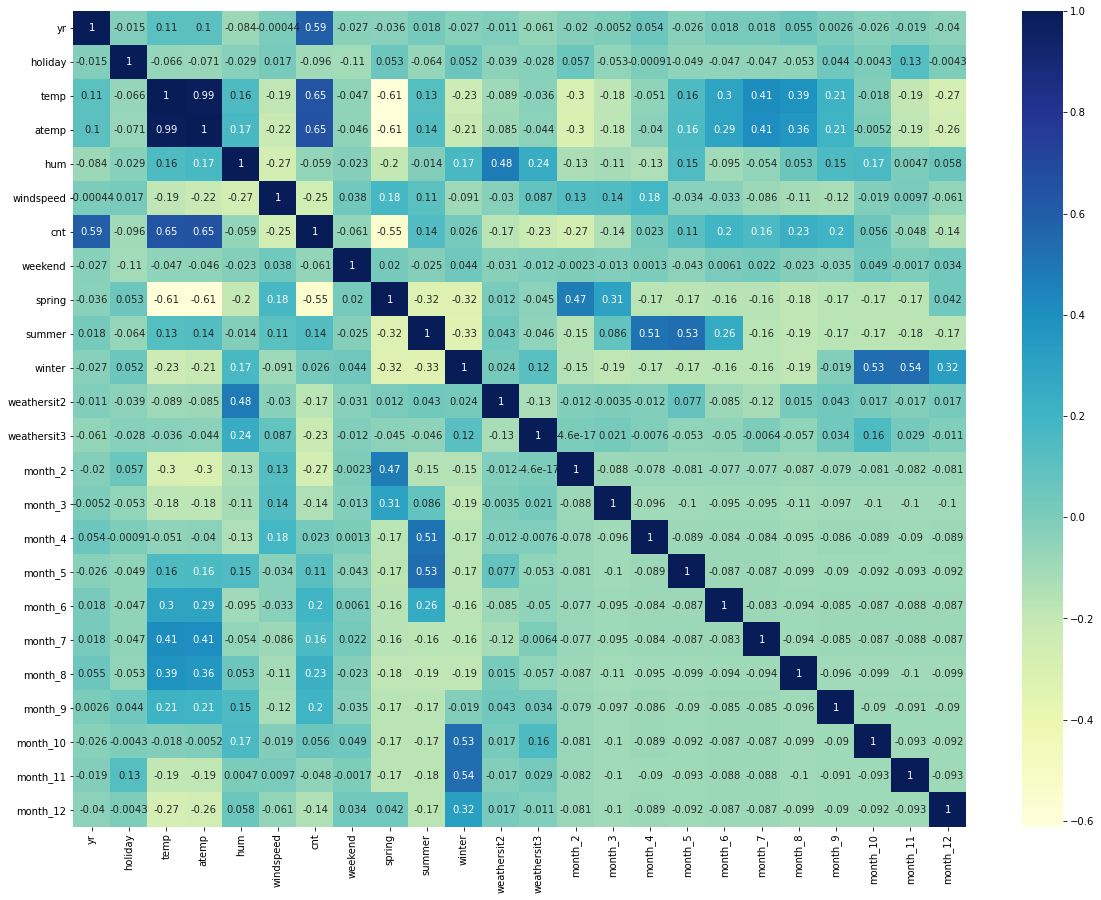

In [763]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(), annot = True, cmap ="YlGnBu")
plt.show()

***Insights***
- Dependent variable cnt has high correlation with "temp", "atemp" and "yr" independent variable
- Dependent variable cnt has a good correlation with "month_6", "month_7","month_8" and "month_9" independent variable
- "temp" and "atemp" is highly correlated with each other.
- "temp" is also significantly correlated with "month_6", "month_7","month_8" and "month_9"
- "hum" has high correlation with "weathersit2" and "weathersit3"
- "spring" is highly correlated with "month_2" and "month_3"
- "summer" is highly correlated with "month_4","month_5" and "month_6"
- "winter" is highly correlated with "month_10","month_11" and "month_12"

## Step5: Building a linear model

### Dividing into X and Y sets for the model building

In [764]:
# X_train, y_train
y_train = df_train.pop("cnt")
X_train = df_train

- We have 23 independent variables to consider the model building. 
- Considering all variables to build the model and eliminate one by one to build a better model will take time.
- Therefore, preferring to apply RFE first to eliminate and bring down the variable to a smaller set.
- If required, we can start the manual elimination process from there.

### RFE

In [765]:
# Run RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [766]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekend', False, 9),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weathersit2', True, 1),
 ('weathersit3', True, 1),
 ('month_2', False, 5),
 ('month_3', True, 1),
 ('month_4', False, 3),
 ('month_5', True, 1),
 ('month_6', False, 2),
 ('month_7', False, 6),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 7),
 ('month_12', False, 8)]

In [767]:
# Check the selected columns after recurssive feature elimination
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'weathersit2', 'weathersit3', 'month_3', 'month_5', 'month_8',
       'month_9', 'month_10'],
      dtype='object')

In [768]:
# Check the rejected columns after recurssive feature elimination
X_train.columns[~rfe.support_]

Index(['atemp', 'weekend', 'month_2', 'month_4', 'month_6', 'month_7',
       'month_11', 'month_12'],
      dtype='object')

In [769]:
# Create X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Build a linear model - Model 1

In [770]:
# Add a constant
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()

# Print the summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.00e-188
Time:                        20:18:03   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2799      0.036      7.775      

### Checking VIF

In [771]:
vif = pd.DataFrame()
vif["features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,29.46
2,temp,15.38
4,windspeed,4.77
5,spring,4.72
7,winter,4.30
6,summer,3.85
8,weathersit2,2.29
0,yr,2.10
12,month_8,1.80
11,month_5,1.63


In [772]:
# Drop month_5 as it has high p-value 
X = X_train_rfe.drop("month_5", axis = 1)

### Build a linear model - Model 2

In [773]:
X_train_rfe_sm  = sm.add_constant(X)
lr= sm.OLS(y_train, X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          2.46e-189
Time:                        20:18:03   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2684      0.035      7.601      0.000       0.199       0.338
yr              0.2298      0.008     28.366      0.000       0.214       0.246
holiday        -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp            0.4965      0.034     14.604      0.000       0.430       0.563
hum            -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed      -0.1858      0.026     -7.234      0.000      -0.236      -0.135
spring         -0.0361      0.023     -1.593      0.112      -0.081       0.008
summer          0.0864      0.016      5.282      0.000       0.054       0.119
winter          0.1140      0.020      5.685      0.000       0.075       0.153
weathersit2    -0.0544      0.010     -5.199      0.000      -0.075      -0.034
weathersit3    -0.2449      0.026     -9.259      0.000      -0.297      -0.193
month_3         0.0279      0.014      1.931      0.054      -0.000       0.056
month_8         0.0505      0.018      2.883      0.004       0.016       0.085
month_9         0.1202      0.017      6.946      0.000       0.086       0.154
month_10        0.0393      0.018      2.231      0.026       0.005       0.074
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [774]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,29.44
2,temp,15.32
5,spring,4.70
4,windspeed,4.69
7,winter,4.30
6,summer,3.28
8,weathersit2,2.29
0,yr,2.09
11,month_8,1.80
13,month_10,1.60


In [775]:
# Drop spring as it has high p-value 
X = X.drop("spring", axis = 1)

### Build a linear model - Model 3

In [776]:
X_train_rfe_sm  = sm.add_constant(X)
lr= sm.OLS(y_train, X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          5.94e-190
Time:                        20:18:03   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2326      0.027      8.525      0.000       0.179       0.286
yr              0.2287      0.008     28.289      0.000       0.213       0.245
holiday        -0.0917      0.026     -3.591      0.000      -0.142      -0.042
temp            0.5371      0.023     23.855      0.000       0.493       0.581
hum            -0.1806      0.037     -4.835      0.000      -0.254      -0.107
windspeed      -0.1893      0.026     -7.388      0.000      -0.240      -0.139
summer          0.1059      0.011      9.743      0.000       0.085       0.127
winter          0.1393      0.012     11.304      0.000       0.115       0.163
weathersit2    -0.0532      0.010     -5.093      0.000      -0.074      -0.033
weathersit3    -0.2401      0.026     -9.123      0.000      -0.292      -0.188
month_3         0.0233      0.014      1.642      0.101      -0.005       0.051
month_8         0.0605      0.016      3.699      0.000       0.028       0.093
month_9         0.1292      0.016      7.897      0.000       0.097       0.161
month_10        0.0355      0.017      2.032      0.043       0.001       0.070
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [777]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,14.73
2,temp,10.01
4,windspeed,3.70
6,winter,2.32
7,weathersit2,2.14
0,yr,2.02
5,summer,1.84
10,month_8,1.61
12,month_10,1.60
11,month_9,1.34


In [778]:
# Drop month_3 as it has high p-value 
X = X.drop("month_3", axis = 1)

### Build a linear model - Model 4

In [779]:
X_train_rfe_sm  = sm.add_constant(X)
lr= sm.OLS(y_train, X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.49e-190
Time:                        20:18:03   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2390      0.027      8.838      0.000       0.186       0.292
yr              0.2289      0.008     28.264      0.000       0.213       0.245
holiday        -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp            0.5316      0.022     23.836      0.000       0.488       0.575
hum            -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed      -0.1868      0.026     -7.291      0.000      -0.237      -0.136
summer          0.1058      0.011      9.719      0.000       0.084       0.127
winter          0.1353      0.012     11.180      0.000       0.112       0.159
weathersit2    -0.0531      0.010     -5.073      0.000      -0.074      -0.033
weathersit3    -0.2385      0.026     -9.052      0.000      -0.290      -0.187
month_8         0.0585      0.016      3.583      0.000       0.026       0.091
month_9         0.1277      0.016      7.803      0.000       0.096       0.160
month_10        0.0358      0.018      2.046      0.041       0.001       0.070
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [780]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,hum,14.38
2,temp,9.88
4,windspeed,3.59
6,winter,2.25
7,weathersit2,2.13
0,yr,2.02
5,summer,1.84
9,month_8,1.60
11,month_10,1.60
10,month_9,1.34


In [781]:
# Drop "hum" as it has high vif value 
X = X.drop("hum", axis = 1)

### Build a linear model - Model 5

In [782]:
X_train_rfe_sm  = sm.add_constant(X)
lr= sm.OLS(y_train, X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          9.45e-187
Time:                        20:18:03   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1346      0.017      8.014      0.000       0.102       0.168
yr              0.2329      0.008     28.281      0.000       0.217       0.249
holiday        -0.0956      0.026     -3.660      0.000      -0.147      -0.044
temp            0.5099      0.022     22.823      0.000       0.466       0.554
windspeed      -0.1517      0.025     -6.035      0.000      -0.201      -0.102
summer          0.1026      0.011      9.237      0.000       0.081       0.124
winter          0.1266      0.012     10.345      0.000       0.103       0.151
weathersit2    -0.0820      0.009     -9.299      0.000      -0.099      -0.065
weathersit3    -0.2869      0.025    -11.510      0.000      -0.336      -0.238
month_8         0.0569      0.017      3.406      0.001       0.024       0.090
month_9         0.1208      0.017      7.245      0.000       0.088       0.154
month_10        0.0311      0.018      1.741      0.082      -0.004       0.066
==============================================================================
Omnibus:                       61.862   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.356
Skew:                          -0.653   Prob(JB):                     2.02e-31
Kurtosis:                       5.224   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [783]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,winter,1.93
4,summer,1.83
8,month_8,1.59
10,month_10,1.59
6,weathersit2,1.49
9,month_9,1.34
7,weathersit3,1.10


In [784]:
# Drop "month_10" as it has high p-value
X = X.drop("month_10", axis = 1)

### Build a linear model - Model 6

In [785]:
X_train_rfe_sm  = sm.add_constant(X)
lr= sm.OLS(y_train, X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          2.62e-187
Time:                        20:18:03   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1307      0.017      7.837      0.000       0.098       0.163
yr              0.2326      0.008     28.191      0.000       0.216       0.249
holiday        -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp            0.5173      0.022     23.546      0.000       0.474       0.561
windspeed      -0.1497      0.025     -5.950      0.000      -0.199      -0.100
summer          0.1012      0.011      9.116      0.000       0.079       0.123
winter          0.1371      0.011     12.843      0.000       0.116       0.158
weathersit2    -0.0811      0.009     -9.200      0.000      -0.098      -0.064
weathersit3    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
month_8         0.0541      0.017      3.249      0.001       0.021       0.087
month_9         0.1163      0.017      7.046      0.000       0.084       0.149
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [786]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,summer,1.82
8,month_8,1.58
6,weathersit2,1.49
5,winter,1.48
9,month_9,1.31
7,weathersit3,1.08
1,holiday,1.04


In [787]:
# Drop "month_8" based on his p-value
X = X.drop("month_8", axis = 1)

### Build a linear model - Model 7

In [788]:
X_train_rfe_sm  = sm.add_constant(X)
lr= sm.OLS(y_train, X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          2.83e-186
Time:                        20:18:03   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1259      0.017      7.508      0.000       0.093       0.159
yr              0.2329      0.008     27.962      0.000       0.216       0.249
holiday        -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp            0.5480      0.020     27.360      0.000       0.509       0.587
windspeed      -0.1532      0.025     -6.039      0.000      -0.203      -0.103
summer          0.0881      0.010      8.437      0.000       0.068       0.109
winter          0.1293      0.011     12.314      0.000       0.109       0.150
weathersit2    -0.0784      0.009     -8.844      0.000      -0.096      -0.061
weathersit3    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
month_9         0.1012      0.016      6.330      0.000       0.070       0.133
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

In [789]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,summer,1.57
6,weathersit2,1.48
5,winter,1.37
8,month_9,1.20
7,weathersit3,1.08
1,holiday,1.04


***Model 7 looks good as the p-value and VIF of the independent varaibles are in accepted range. 
i.e. Variables are significant and multicilinearity does not exists.***


## Step 6: Residual Analysis of train data

In [790]:
y_train_pred = lr_model.predict(X_train_rfe_sm)

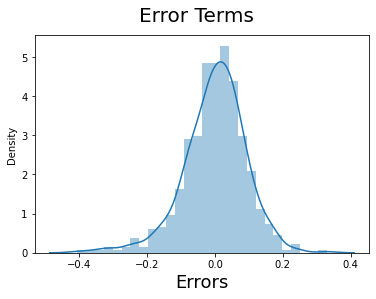

In [791]:
# Plot the histogram of the error terms
res = y_train - y_train_pred

fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

***Error terms are normally distributed with mean 0.***

## Step 7: Making Predictions Using the Final Model

### Applying the scaling on the test data

In [792]:
# create list of numeric variables
num_vars = ["temp","atemp","hum","windspeed","cnt"]
# fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,weekend,spring,summer,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
184,0,1,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,1,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [793]:
df_test.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,weekend,spring,summer,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.254545,0.263636,...,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364
std,0.500809,0.187620,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.436599,0.441609,...,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [794]:
y_test = df_test.pop("cnt")
X_test = df_test

In [795]:
X_test.columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'weekend',
       'spring', 'summer', 'winter', 'weathersit2', 'weathersit3', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [796]:
# variables in final model
finalcols = X.columns

# test dataset with final variables
X_test = X_test[finalcols]

In [797]:
#add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,summer,winter,weathersit2,weathersit3,month_9
184,1.0,0,1,0.831783,0.084219,0,0,1,0,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,1,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


In [798]:
# Make predictions using the final model
y_test_pred = lr_model.predict(X_test_sm)

## Step 8: Model Evaluation

Text(0, 0.5, 'y_test_pred')

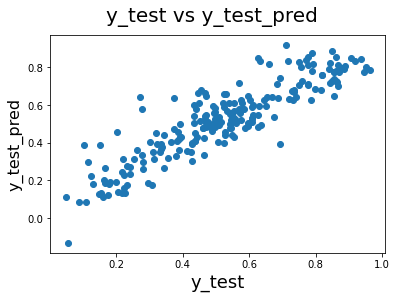

In [799]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                               # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

### r2 score for test data

In [800]:
r2_score(y_test, y_test_pred)

0.7941977535477243

***r2_score for test set is very close to r2_score of training test. 
Therefore it can be concluded that the final model is able to generalize its learning on the test set as well.***

Equation for our best fitted line is:
***cnt = 0.1259 + (yr × 0.2329) - (holiday × 0.0987) + (temp × 0.5480) − (windspeed × 0.1532) + (summer × 0.0881) + (winter × 0.1293) − (weathersit2 × 0.0784) − (weathersit3 × 0.2829) + (month_9 x 0.1012)***

***Based on above equation, "temp", "weathersit3" and "yr" are the most influencial variables for bike booking.***